In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from gorillatracker.utils.embedding_generator import read_embeddings_from_disk
import numpy as np
from sklearn.preprocessing import StandardScaler


# Read embeddings from disk
# df = read_embeddings_from_disk("example.pkl")

# # print(len(df["label"].unique()))
# # X = np.vstack(df["embedding"].values)
# # # Generate synthetic dataset (replace this with your embeddings)
# # # X, _ = make_blobs(n_samples=75000, centers=4, cluster_std=0.60, random_state=0)

# # # Standardize features by removing the mean and scaling to unit variance
# # X = StandardScaler().fit_transform(X)

# # # Range of epsilon values to try
# # eps_values = np.linspace(0.1, 1.5, 15)

# # # Initialize lists to store silhouette scores and Davies-Bouldin indices
# # silhouette_scores = []
# # davies_bouldin_indices = []
# # num_clusters_list = []

# # for eps in eps_values:
# #     print("EPS", eps)
# #     # Initialize DBSCAN
# #     dbscan = DBSCAN(eps=eps, min_samples=5, n_jobs=-1)

# #     # Fit the model and predict the cluster for each data point
# #     cluster_labels = dbscan.fit_predict(X)

# #     # Filter out noise points (-1) for silhouette score calculation
# #     if len(set(cluster_labels)) > 1 and -1 in cluster_labels:
# #         silhouette_avg = silhouette_score(X[cluster_labels != -1], cluster_labels[cluster_labels != -1])
# #         db_index = davies_bouldin_score(X[cluster_labels != -1], cluster_labels[cluster_labels != -1])
# #     elif len(set(cluster_labels)) > 1:
# #         silhouette_avg = silhouette_score(X, cluster_labels)
# #         db_index = davies_bouldin_score(X, cluster_labels)
# #     else:
# #         silhouette_avg = -1
# #         db_index = float("inf")

# #     silhouette_scores.append(silhouette_avg)
# #     davies_bouldin_indices.append(db_index)
# #     num_clusters_list.append(len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0))

# # # Plot silhouette scores
# # plt.figure(figsize=(12, 6))
# # plt.subplot(1, 2, 1)
# # plt.plot(eps_values, silhouette_scores, marker="o")
# # plt.title("Silhouette Score")
# # plt.xlabel("Epsilon (eps)")
# # plt.ylabel("Silhouette Score")

# # # Plot Davies-Bouldin indices
# # plt.subplot(1, 2, 2)
# # plt.plot(eps_values, davies_bouldin_indices, marker="o", color="red")
# # plt.title("Davies-Bouldin Index")
# # plt.xlabel("Epsilon (eps)")
# # plt.ylabel("Davies-Bouldin Index")

# # plt.tight_layout()
# # plt.show()

# # # Find the optimal epsilon based on Silhouette Score and Davies-Bouldin Index
# # optimal_eps_silhouette = eps_values[np.argmax(silhouette_scores)]
# # optimal_eps_davies_bouldin = eps_values[np.argmin(davies_bouldin_indices)]

# # print(f"Optimal epsilon based on Silhouette Score: {optimal_eps_silhouette}")
# # print(f"Optimal epsilon based on Davies-Bouldin Index: {optimal_eps_davies_bouldin}")

# # Print the number of clusters for the optimal epsilons
# print(f"Number of clusters for optimal Silhouette Score: {num_clusters_list[np.argmax(silhouette_scores)]}")
# print(f"Number of clusters for optimal Davies-Bouldin Index: {num_clusters_list[np.argmin(davies_bouldin_indices)]}")

In [2]:
df = read_embeddings_from_disk("example.pkl")

embeddings = np.vstack(df["embedding"].values)
labels = df["label"].values

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(embeddings, labels)
print("Silhouette Score: ", score)


/opt/conda/envs/research/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


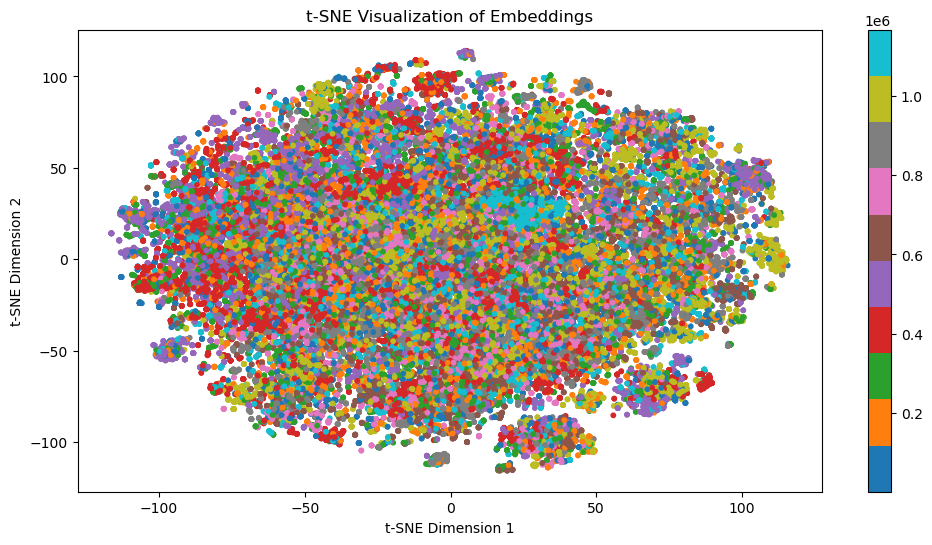

In [3]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Assuming `embeddings` is your numpy array of shape (80k, embedding_dim)
pca = PCA(n_components=50)  # Reduce to 50 dimensions or a suitable number
reduced_embeddings = pca.fit_transform(embeddings)

tsne = TSNE(n_components=2, perplexity=40, n_iter=1000, random_state=42)
tsne_embeddings = tsne.fit_transform(reduced_embeddings)

plt.figure(figsize=(12, 6))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=labels, cmap="tab10", s=10)
plt.title("t-SNE Visualization of Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar()
plt.show()